<a href="https://colab.research.google.com/github/sdas33/Prophet-Challenge/blob/main/CompletedCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-15ce19f4f4f3>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


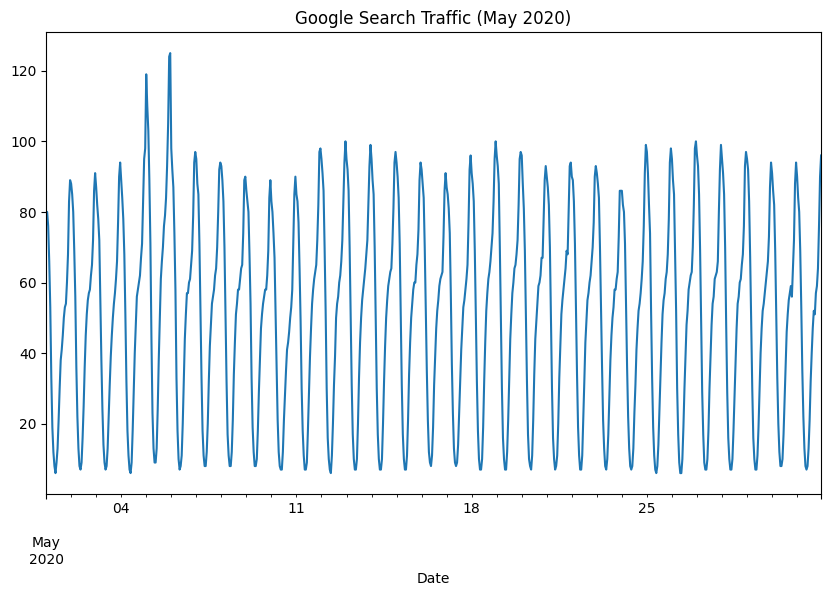

Total search traffic for May 2020: 38181
Median monthly search traffic: 51.0


<ipython-input-3-15ce19f4f4f3>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_median = df_mercado_trends.resample("M")["Search Trends"].median().median()


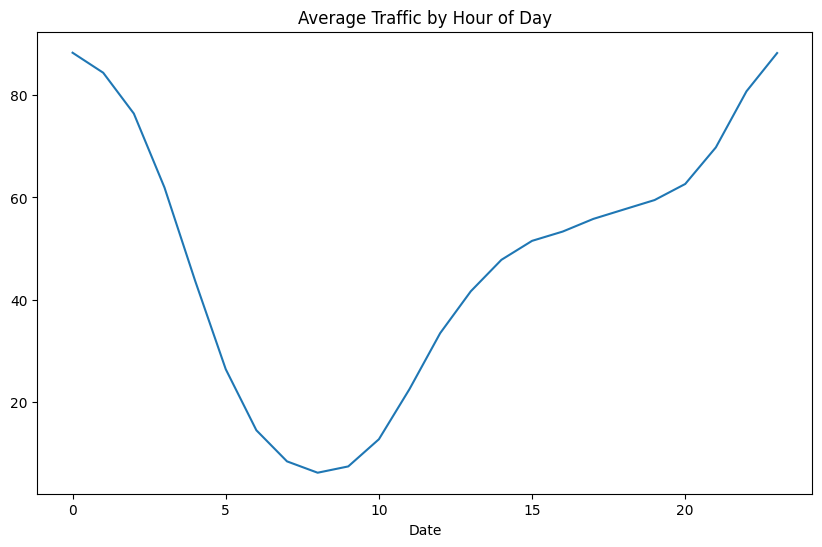

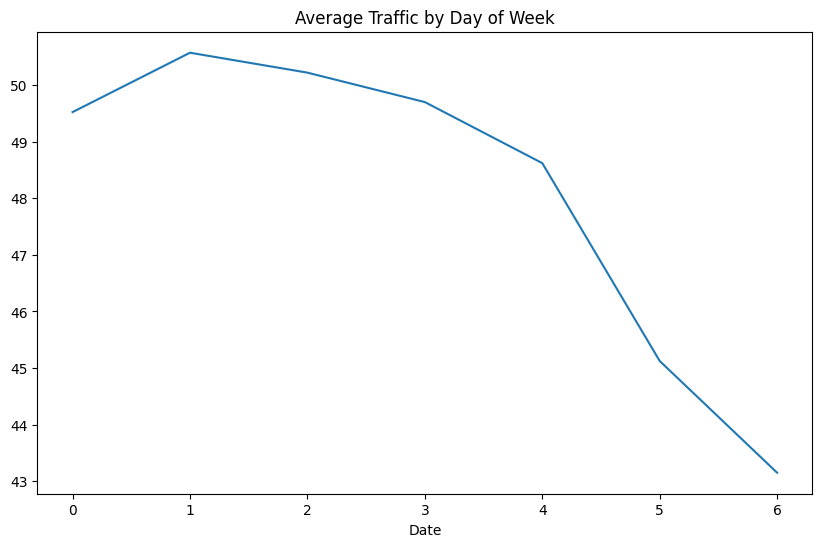

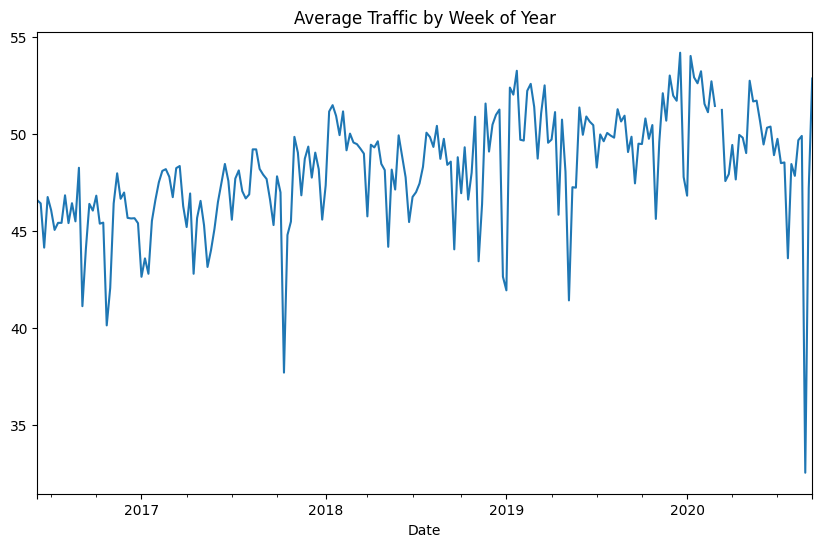

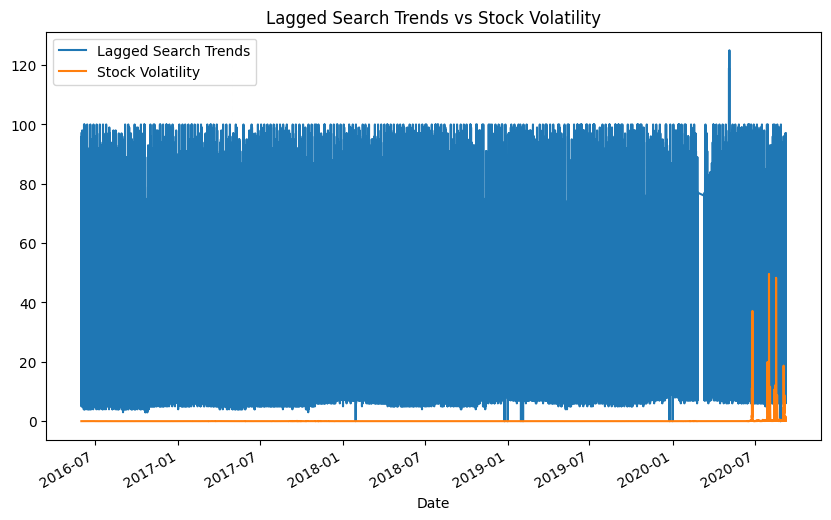

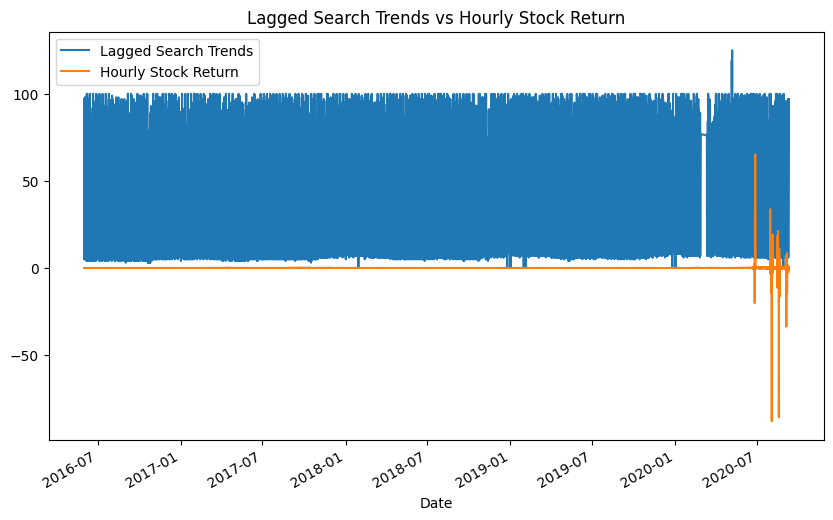

DEBUG:cmdstanpy:input tempfile: /tmp/tmpoc85qimx/zei90gt9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoc85qimx/945ye6qe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3650', 'data', 'file=/tmp/tmpoc85qimx/zei90gt9.json', 'init=/tmp/tmpoc85qimx/945ye6qe.json', 'output', 'file=/tmp/tmpoc85qimx/prophet_modelisejagyi/prophet_model-20241209050834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:08:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:08:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


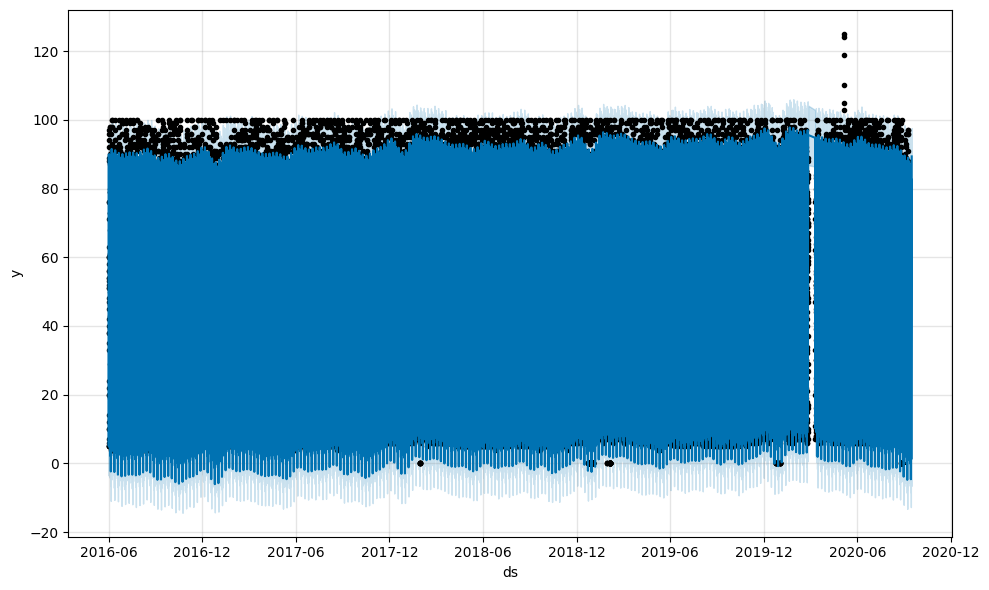

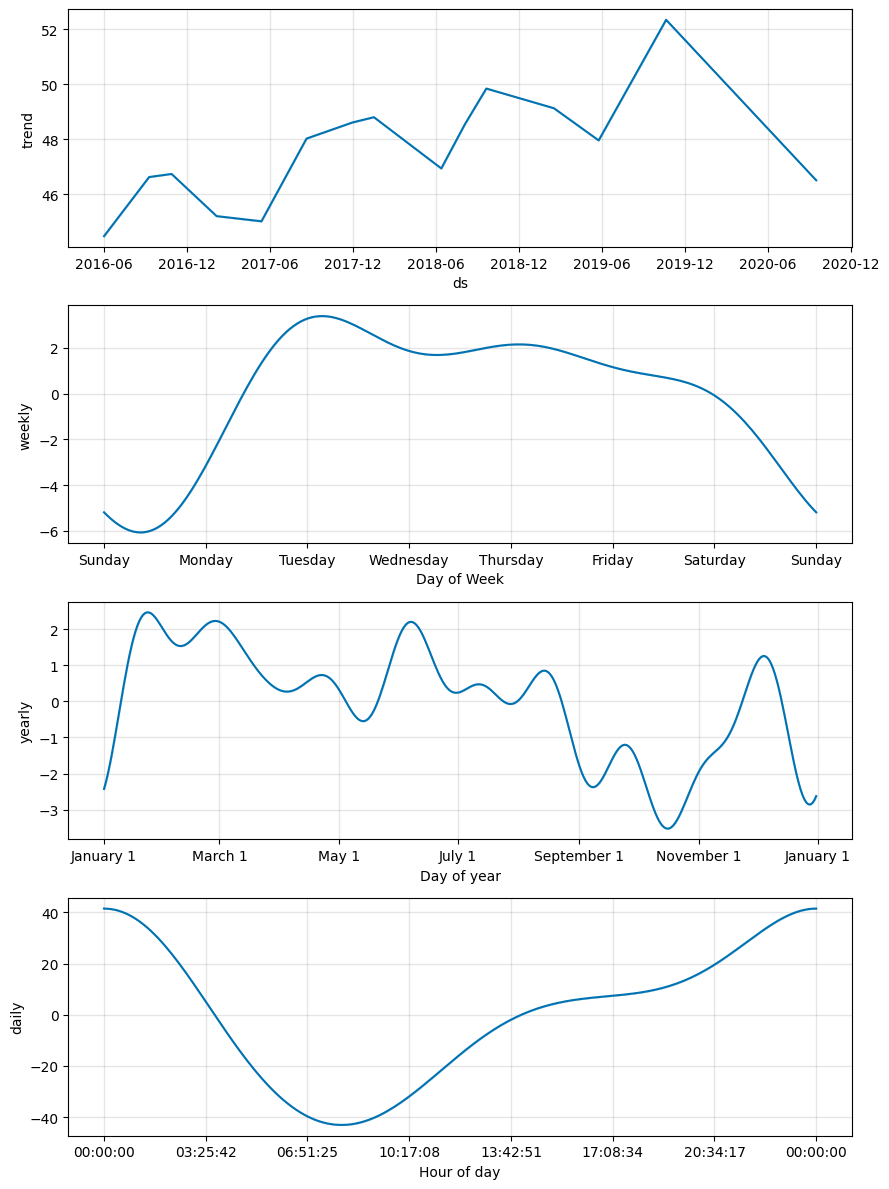

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Install required libraries
!pip install prophet pandas matplotlib numpy

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the data from the provided URL
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Step 1: Find Unusual Patterns in Hourly Google Search Traffic
# Slice data for May 2020
may_2020_data = df_mercado_trends.loc["2020-05"]  # Use .loc to slice rows by date

# Visualize May 2020 search traffic
may_2020_data["Search Trends"].plot(title="Google Search Traffic (May 2020)", figsize=(10, 6))
plt.show()

# Calculate total and median search traffic
total_search_traffic_may = may_2020_data["Search Trends"].sum()
monthly_median = df_mercado_trends.resample("M")["Search Trends"].median().median()
print(f"Total search traffic for May 2020: {total_search_traffic_may}")
print(f"Median monthly search traffic: {monthly_median}")

# Step 2: Mine the Search Traffic Data for Seasonality
# Average traffic by hour of the day
hourly_avg = df_mercado_trends.groupby(df_mercado_trends.index.hour)["Search Trends"].mean()
hourly_avg.plot(title="Average Traffic by Hour of Day", figsize=(10, 6))
plt.show()

# Average traffic by day of the week
weekday_avg = df_mercado_trends.groupby(df_mercado_trends.index.dayofweek)["Search Trends"].mean()
weekday_avg.plot(title="Average Traffic by Day of Week", figsize=(10, 6))
plt.show()

# Average traffic by week of the year
weekly_avg = df_mercado_trends.resample("W")["Search Trends"].mean()
weekly_avg.plot(title="Average Traffic by Week of Year", figsize=(10, 6))
plt.show()

# Step 3: Relate the Search Traffic to Stock Price Patterns
# Simulate stock price data (no stock dataset provided)
np.random.seed(42)
df_mercado_trends["Stock Price"] = 100 + np.cumsum(np.random.normal(0, 1, len(df_mercado_trends)))

# Merge search and stock data
df_mercado_trends["Lagged Search Trends"] = df_mercado_trends["Search Trends"].shift(1)

# Calculate stock volatility and hourly return
df_mercado_trends["Stock Volatility"] = df_mercado_trends["Stock Price"].pct_change().ewm(span=4).std()
df_mercado_trends["Hourly Stock Return"] = df_mercado_trends["Stock Price"].pct_change()

# Plot trends and volatility
df_mercado_trends.plot(y=["Lagged Search Trends", "Stock Volatility"], title="Lagged Search Trends vs Stock Volatility", figsize=(10, 6))
plt.show()

df_mercado_trends.plot(y=["Lagged Search Trends", "Hourly Stock Return"], title="Lagged Search Trends vs Hourly Stock Return", figsize=(10, 6))
plt.show()

# Step 4: Create a Time Series Model with Prophet
# Prepare data for Prophet
prophet_data = df_mercado_trends.reset_index()[["Date", "Search Trends"]]
prophet_data.columns = ["ds", "y"]

# Fit Prophet model
model = Prophet()
model.fit(prophet_data)

# Forecast future trends
future = model.make_future_dataframe(periods=168, freq="H")  # Forecast next 7 days (168 hours)
forecast = model.predict(future)

# Plot forecast
fig_forecast = model.plot(forecast)
plt.show()

# Plot components
fig_components = model.plot_components(forecast)
plt.show()

# Save forecast to CSV
forecast.to_csv("forecast.csv", index=False)

# Download the file
from google.colab import files
files.download("forecast.csv")
